In [1]:
import numpy as np
from numpy import fft
from itertools import chain, zip_longest
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # higher res notebook output

The block below sets up wavenumbers `k`, the Laplacian in Fourier space `L`, and the data that I will apply the filter to `f0`. 

The data is constructed so that the DFT of the data is 1 for all wavenumbers. Once we've applied the filter, if we compute and plot the absolute value of the FFT of `f` then what we see is the effective filter shape.

In [2]:
%matplotlib inline
k = np.concatenate([np.arange(0,129), np.arange(-127,0)])
L = - k**2
fHat = np.exp(1j*np.random.uniform(0,2*np.pi,256))
f0 = fft.ifft(fHat)
n_steps = 128
fftshift = np.argsort(k)

In [8]:
fIncreasing = np.zeros((256,128))
fDecreasing = np.zeros((256,128))
fAlternating= np.zeros((256,128))

# First compute the stages arranged from most-amplifying to most-damping
s = (np.arange(43,n_steps+43))**2
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fIncreasing[:,j] = np.abs(fft.fft(f))[fftshift]
    
# Next compute the stages arranged from most-amplifying to most-damping
s = -np.sort(-(np.arange(43,n_steps+43))**2)
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fDecreasing[:,j] = np.abs(fft.fft(f))[fftshift]

# Next plot the stages alternating most-amplifying to most-damping
ind = np.argsort(np.abs(1 - 128**2/s))
s = s[ind] # sorted from most damping to most amplifying
indD = np.argwhere(np.abs(1 - 128**2/s)<=1)
indA = np.argwhere(np.abs(1 - 128**2/s)>1)
sD = s[indD].tolist() # Damping roots, sorted most to least damping
sA = np.flip(s[indA]).tolist() # Amplifying roots, sorted most to least amplifying
s = [x for x in chain(*zip_longest(sD,sA)) if x is not None]
s = np.array([y for x in s for y in x])
for j in range(n_steps):
    f = f0
    for i in range(j):
        fHat = fft.fft(f)
        f = fft.ifft(fHat + (1/s[i])*L*fHat)
    fAlternating[:,j] = np.abs(fft.fft(f))[fftshift]

<ipython-input-9-8f4b4ae5afc0>:3: RuntimeWarning: divide by zero encountered in log10
  im0 = axarr[0].imshow(np.log10(fIncreasing))
<ipython-input-9-8f4b4ae5afc0>:8: RuntimeWarning: divide by zero encountered in log10
  im1 = axarr[1].imshow(np.log10(fDecreasing))
<ipython-input-9-8f4b4ae5afc0>:13: RuntimeWarning: divide by zero encountered in log10
  im2 = axarr[2].imshow(np.log10(fAlternating))


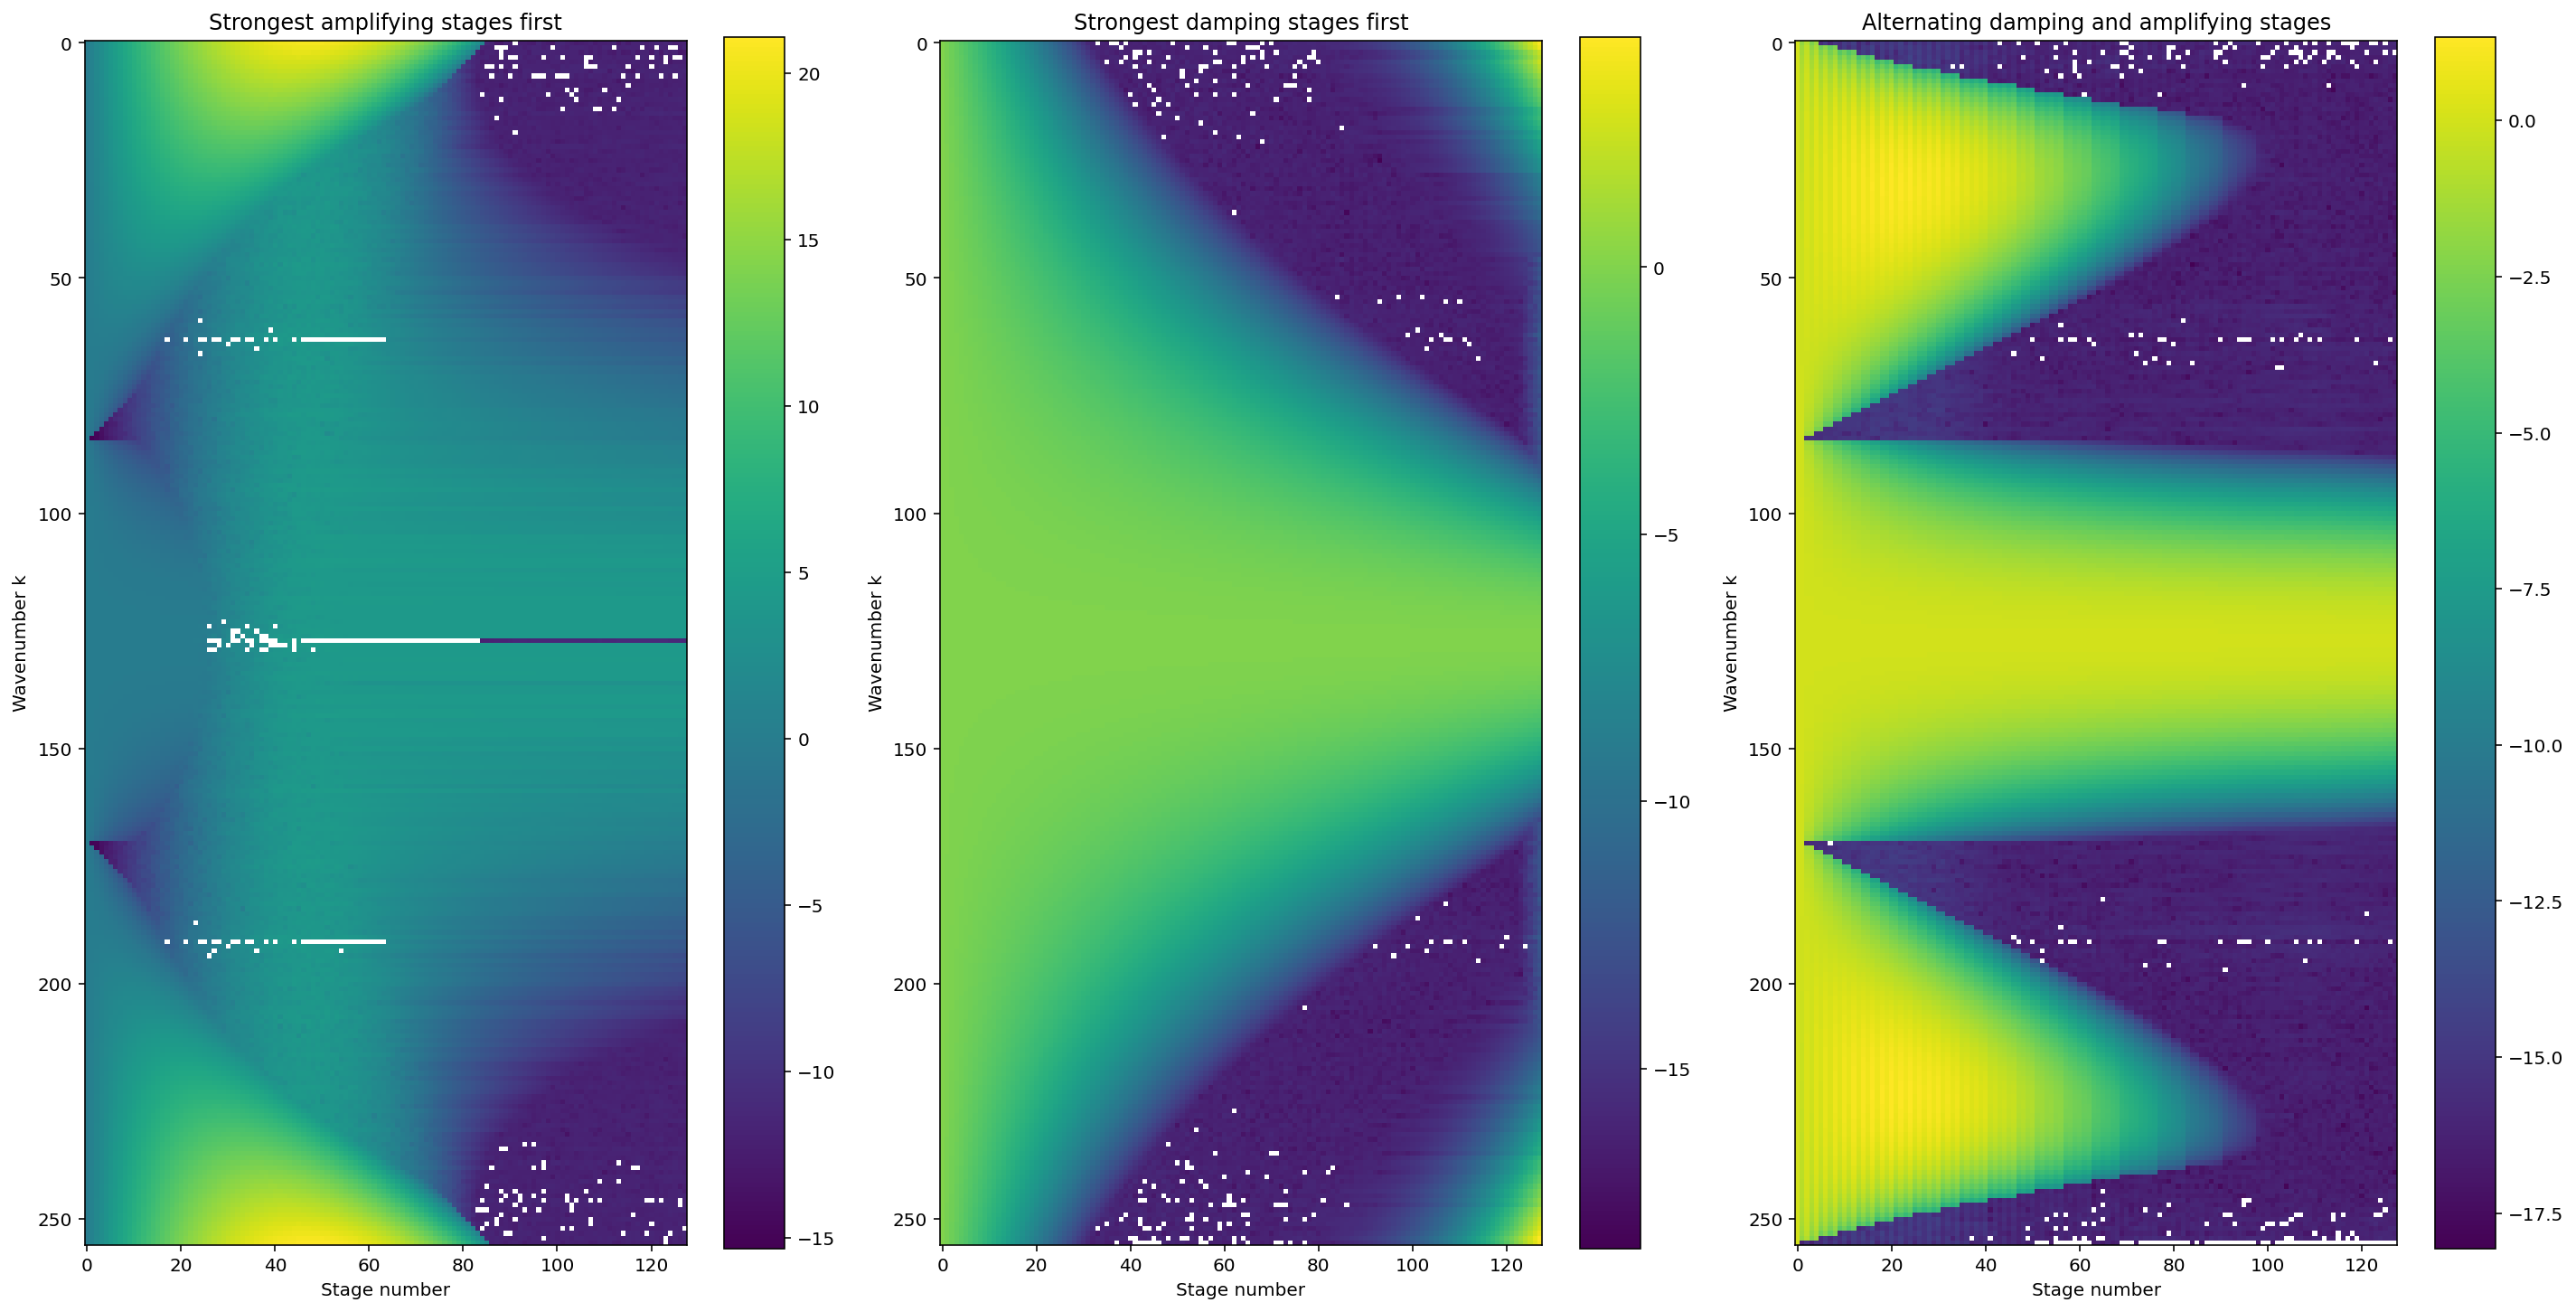

In [9]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=[20,10])

im0 = axarr[0].imshow(np.log10(fIncreasing))
axarr[0].set_xlabel('Stage number')
axarr[0].set_ylabel('Wavenumber k')
axarr[0].set_title('Strongest amplifying stages first')
fig.colorbar(im0,ax=axarr[0])
im1 = axarr[1].imshow(np.log10(fDecreasing))
axarr[1].set_xlabel('Stage number')
axarr[1].set_ylabel('Wavenumber k')
axarr[1].set_title('Strongest damping stages first')
fig.colorbar(im1,ax=axarr[1])
im2 = axarr[2].imshow(np.log10(fAlternating))
axarr[2].set_xlabel('Stage number')
axarr[2].set_ylabel('Wavenumber k')
axarr[2].set_title('Alternating damping and amplifying stages')
fig.colorbar(im2,ax=axarr[2])

plt.tight_layout()

In [11]:
print(np.max(fIncreasing))
print(np.max(fDecreasing))
print(np.max(fAlternating))

1.1955606896819367e+21
20297.73785047442
21.814035836405388
